# <p style="text-align: center;">Rainwater Morehead's Class Notebook for Nashville Software School - Analytics Jumpstart </p>
## <p style="text-align: center;">Rainwater Morehead | she/her | https://github.com/Kytsuine | rain.m@mailfence.com</p>
## <p style="text-align: center;">Python · Pandas · Seaborn</p>

In [1]:
import pandas as pd    ##Imports with standard abbreviations for these libraries. Pandas is a data management library.
import matplotlib.pyplot as plt  ##Used to plot data.
import seaborn as sns  ##Used to plot data more accessibly and prettily than with matplotlib; depends on plt.
import sqlite3 as sql  ##Used to manage databases.
                       ##Outputs plots in the notebook.
%matplotlib inline    

# Police Calls Dataset and Analysis

In [2]:
police_Calls = pd.read_csv('../data/police_calls_2018.csv')  ##Imports a data set from csv, uses the pandas library.

In [3]:
police_Calls.head() ##Returns the first five rows of the data set by default, pass argument within the parenthesis to 

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [4]:
police_Calls.tail(3)  ##Returns the last three rows of data set. Without argument, defaults to five.

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718019,PD201800783912,08/08/2018 10:15:20 AM,0,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,0.0,HIGHWAY 70&CHEATHAM CO LINE,NaN,W,25,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM
718020,PD201800800491,08/13/2018 11:51:29 AM,20180693242,A,96,Business Check,4,ASSISTED CITIZEN,0.0,HIGHWAY 70&CHEATHAM CO LINE,5252,W,23,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM


In [5]:
police_Calls.shape  ##Returns number of rows and columns in data set (in that order.)

(718021, 18)

In [6]:
police_Calls.columns  ##Lists the columns of the data set.

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Block', 'Street Name', 'Unit Dispatched', 'Sector', 'Zone', 'Latitude',
       'Longitude', 'geometry', 'zipcode', 'PO'],
      dtype='object')

In [7]:
police_Calls = police_Calls.drop(columns = ['Event Number', 'Complaint Number', 'Block', 'Street Name', 'geometry'])  ##Removes a subset of the columns, passed as an argument.

In [8]:
police_Calls = police_Calls.rename(columns = {
    'Call Received': 'call_time',
    'Shift': 'shift',
    'Tencode': 'tencode',
    'Tencode Description': 'tencode_desc',
    'Disposition Code': 'disposition',
    'Disposition Description': 'disposition_desc',
    'Unit Dispatched': 'unit_dispatched',
    'Sector': 'sector',
    'Zone': 'zone',
    'Latitude': 'lat',
    'Longitude': 'lng',
    'PO': 'po'}) ##More usable names for columns in dataframe

In [9]:
police_Calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


In [10]:
police_Calls['disposition_desc'].unique()  ##Lists all unique values in a given column.

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'DISREGARD / SIGNAL 9',
       'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'NO RESPONSE', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN', nan],
      dtype=object)

In [11]:
police_Calls_Trimmed = police_Calls.loc[~police_Calls.disposition_desc.isin(['','DISREGARD / SIGNAL 9','NO RESPONSE'])]  ##Creates a new data set that does not include rows that have the disposition_desc equal to the values passed.

In [12]:
police_Calls_Trimmed = police_Calls_Trimmed.loc[~police_Calls.disposition_desc.isna()]  ##Removes rows that do not have a disposition_desc value set. (May be possible to combine with above?)

In [13]:
police_Calls_Trimmed.shape

(624841, 13)

## Tencode analysis

In [14]:
tencode_counts = police_Calls_Trimmed['tencode_desc'].value_counts() ##Creates series "tencode_counts" from the column "tencode_desc"'s unique value counts. Uses the values themselves as the index of the series. 

In [15]:
tencode_counts = tencode_counts.reset_index()  ##Converts string tencode_counts into a dataframe, adding the index as a column with the title "index".

In [16]:
tencode_counts.head()

,index,tencode_desc
0,Business Check,154763
1,Traffic Violation,141283
2,Want Officer for Investigation / Assistance,100465
3,Administrative/Special Assignment,34094
4,Community Policing Activity,34001


In [17]:
type(tencode_counts)  ##Returns the type of object "tencode_counts"

pandas.core.frame.DataFrame

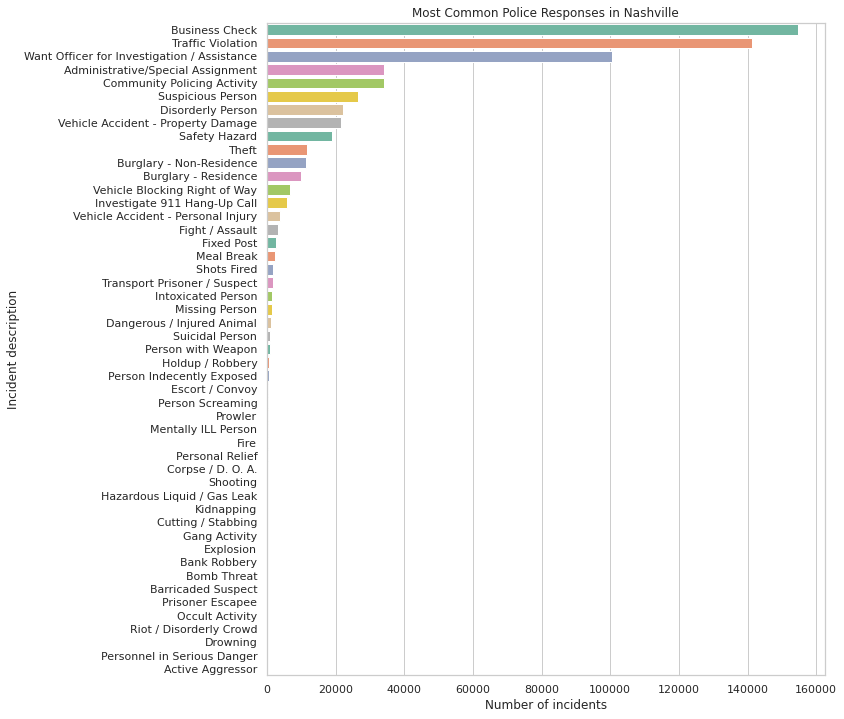

In [18]:
plt.figure(figsize = (10, 12))                               # Increase the plot size to 10 x 12
sns.set(style="whitegrid")                                   # Change the plot style
sns.barplot(x = 'tencode_desc', 
            y = 'index', 
            data = tencode_counts, 
            palette = 'Set2')                                
plt.xlabel('Number of incidents')                                             
plt.ylabel('Incident description')                                              
plt.title('Most Common Police Responses in Nashville');      # Creates a horizontal plot through Seaborn, using style and palette set.

## Rudimentary location analysis by zip code
(Not controlled for population)

In [19]:
zips = police_Calls_Trimmed['zipcode'].value_counts()

In [20]:
zips = zips.reset_index()

In [21]:
zips.head()

,index,zipcode
0,37203,61962
1,37209,52248
2,37207,48750
3,37211,47528
4,37115,39879


In [22]:
zips['index'] = zips['index'].astype('string') ##Converts the 'index' column to string.

In [23]:
zips.info()  ##Confirms above step with Dtype column. Note other useful information here, too.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    38 non-null     string
 1   zipcode  38 non-null     int64 
dtypes: int64(1), string(1)
memory usage: 736.0 bytes


<AxesSubplot:ylabel='index'>

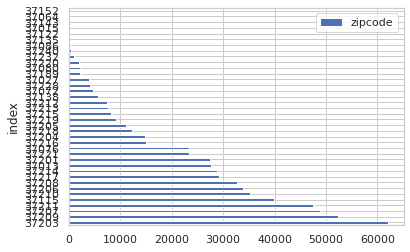

In [24]:
zips.plot(kind = 'barh',
                   x = 'index',
                   y = 'zipcode')  ##Example of default plot - matplotlib does not have particularly pretty defaults.

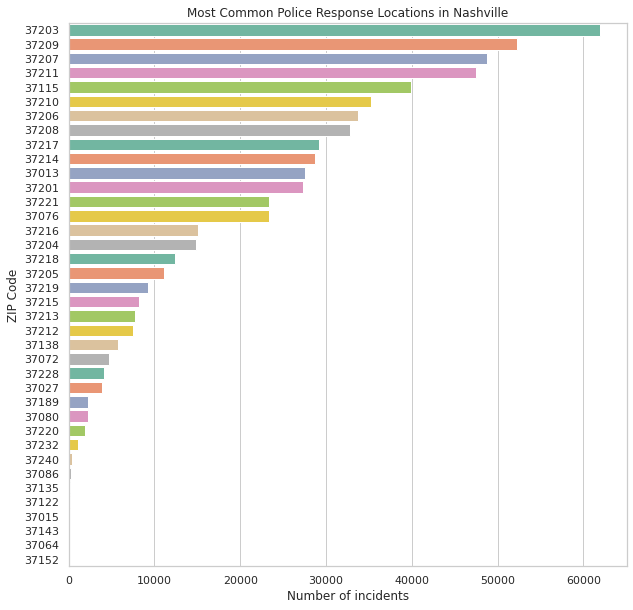

In [25]:
plt.figure(figsize = (10, 10))                               # Increase the plot size to 10 x 10
sns.set(style="whitegrid")                                  # Change the plot style
sns.barplot(x = 'zipcode', 
            y = 'index', 
            data = zips, 
            palette = 'Set2')
plt.xlabel('Number of incidents')                                              
plt.ylabel('ZIP Code')                                              
plt.title('Most Common Police Response Locations in Nashville');

## Date analysis

In [26]:
police_Calls_Trimmed.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


In [27]:
police_Calls_Trimmed['call_time'] = pd.to_datetime(police_Calls_Trimmed['call_time'], format = '%m/%d/%Y %I:%M:%S %p') ##See very useful format documentation at https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [28]:
police_Calls_Trimmed['month'] = police_Calls_Trimmed['call_time'].dt.month_name() ##month_name used here to be more easily understood. Consider month for time comparisons.

In [29]:
police_Calls_Trimmed['month'].value_counts()

January      85094
March        79892
May          74718
August       73181
June         73098
February     72413
April        65953
July         57558
September    42934
Name: month, dtype: int64

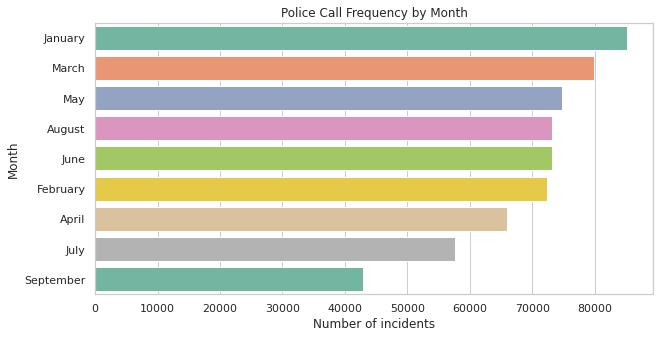

In [30]:
plt.figure(figsize = (10, 5))                               # Increase the plot size to 10 x 10
sns.set(style="whitegrid")                                  # Change the plot style
sns.barplot(x = police_Calls_Trimmed['month'].value_counts(), 
            y = police_Calls_Trimmed['month'].value_counts().index, 
            data = police_Calls_Trimmed, 
            palette = 'Set2')
plt.xlabel('Number of incidents')                                              
plt.ylabel('Month')                                              
plt.title('Police Call Frequency by Month');

In [31]:
police_Calls_Trimmed['weekday'] = police_Calls_Trimmed['call_time'].dt.day_name()  ##Uses the day_name function from pandas' datetime.

In [32]:
police_Calls_Trimmed['weekday'].value_counts()

Tuesday      102706
Wednesday    101700
Thursday      97885
Friday        95998
Monday        92536
Saturday      71102
Sunday        62914
Name: weekday, dtype: int64

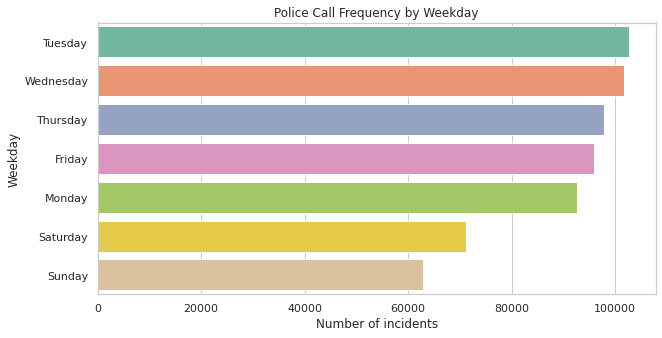

In [33]:
plt.figure(figsize = (10, 5))                               # Increase the plot size to 10 x 10
sns.set(style="whitegrid")                                  # Change the plot style
sns.barplot(x = police_Calls_Trimmed['weekday'].value_counts(), 
            y = police_Calls_Trimmed['weekday'].value_counts().index, 
            data = police_Calls_Trimmed, 
            palette = 'Set2')
plt.xlabel('Number of incidents')                                              
plt.ylabel('Weekday')                                              
plt.title('Police Call Frequency by Weekday');

# Hub Nashville Dataset and Analysis

In [34]:
hub = pd.read_csv('../data/hubNashville_2018.csv')

In [35]:
hub.columns

Index(['Request #', 'Status', 'Request Type', 'Subrequest Type',
       'Additional Subrequest Type', 'Date / Time Opened',
       'Date / Time Closed', 'Request Origin', 'Zipcode', 'Latitude',
       'Longitude'],
      dtype='object')

In [36]:
hub.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345


In [37]:
hub = hub.rename(columns = {
    'Request #': 'request_id',
    'Status': 'status',
    'Request Type': 'request_type',
    'Subrequest Type': 'subrequest_type',
    'Additional Subrequest Type': 'add_subrequest_type',
    'Date / Time Opened': 'opened',
    'Date / Time Closed': 'closed',
    'Request Origin': 'origin',
    'Zipcode': 'zipcode',
    'Latitude': 'lat',
    'Longitude': 'lng'
    })

In [38]:
hub = hub.loc[~hub.closed.isna()]  ##Remove open requests

In [39]:
hub.shape

(80866, 11)

In [40]:
hub.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345


In [41]:
hub.opened = pd.to_datetime(hub.opened, format = '%Y-%m-%d %H:%M:%S')

In [42]:
hub.closed = pd.to_datetime(hub.closed, format = '%m/%d/%Y %I:%M:%S %p')

In [43]:
hub.head(1)

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,2018-02-12 15:48:14,Phone,37115.0,36.296917,-86.699162


In [44]:
hub['resolution_time'] = hub.closed-hub.opened

In [45]:
hub.resolution_time.max()

Timedelta('938 days 02:22:16')

In [46]:
slow_to_resolve = hub.loc[hub.resolution_time>pd.Timedelta(days=365)]

In [47]:
slow_to_resolve.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time
244,112161,Closed,Property Violations,Residential Complaint,Residential Complaint,2018-10-25 18:28:49,2020-03-18 08:12:19,hubNashville Community,37115.0,36.258170,-86.695750,509 days 13:43:30
250,123468,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2018-12-14 13:12:04,2020-06-29 14:41:39,Phone,37207.0,36.245086,-86.773350,563 days 01:29:35
427,48380,Closed,"Streets, Roads & Sidewalks",Dip/Bump in Roadway,Dip/Bump in Roadway,2018-02-22 16:38:31,2019-12-30 16:59:17,hubNashville Community,37221.0,36.062642,-86.972435,676 days 00:20:46
522,117153,Closed,Other,Other,Other,2018-11-16 03:45:14,2020-01-17 20:39:58,hubNashville Community,37115.0,36.243802,-86.717873,427 days 16:54:44
577,84291,Closed,Property Violations,Cars Parked on Lawn,Cars Parked on Lawn,2018-07-19 18:50:09,2020-05-08 07:10:49,hubNashville Community,37211.0,36.127623,-86.757789,658 days 12:20:40


In [48]:
slow_to_resolve.shape

(288, 12)

In [49]:
slow_to_resolve.request_type.value_counts()

Streets, Roads & Sidewalks    159
Property Violations            73
Public Safety                  14
Other                          14
Electric & Water General       10
Trash, Recycling & Litter       9
Education & Libraries           5
Social Services & Housing       2
Planning & Zoning               2
Name: request_type, dtype: int64

In [50]:
hub['resolution_time_hours'] = hub['resolution_time'] / pd.Timedelta(hours = 1)

In [51]:
hub.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time,resolution_time_hours
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,2018-02-12 15:48:14,Phone,37115.0,36.296917,-86.699162,0 days 01:47:54,1.798333
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,2018-02-12 15:49:13,Phone,37076.0,36.215403,-86.588513,0 days 01:48:52,1.814444
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,2018-02-07 17:04:33,Phone,37076.0,36.187902,-86.607286,4 days 19:46:18,115.771667
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,2018-02-27 21:06:16,hubNashville Community,37203.0,36.153761,-86.788745,3 days 21:39:09,93.652500
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,2018-02-08 15:01:50,Phone,37210.0,36.154836,-86.763345,0 days 01:01:46,1.029444


In [52]:
hub['resolution_time_hours'].describe()

count    80866.000000
mean       352.098805
std       1038.193432
min          0.000000
25%         25.973958
50%         73.271944
75%        203.533333
max      22514.371111
Name: resolution_time_hours, dtype: float64

Wide variation in data makes most plots either unintuitive (log scale) or ungainly (normal scale). Representations of means of central tendency will be more useful.

## Medians by zip code

In [53]:
hub['zipcode'] = hub['zipcode'].astype('string')

In [54]:
streets_median = hub.loc[hub.request_type == 'Streets, Roads & Sidewalks'].groupby('zipcode')['resolution_time_hours'].quantile(0.5)  ##Quantile function returns the value (argument) through the ascent-sorted data. Used here for median. Groupby subsets that to make the quantile return different responses for each zip code represented.

In [55]:
streets_median = streets_median.reset_index()

In [56]:
streets_median = streets_median.rename(columns = {
    'resolution_time_hours': 'median_resolution_time',
    })

In [57]:
streets_median = streets_median.sort_values(by=['median_resolution_time'], ascending=False)

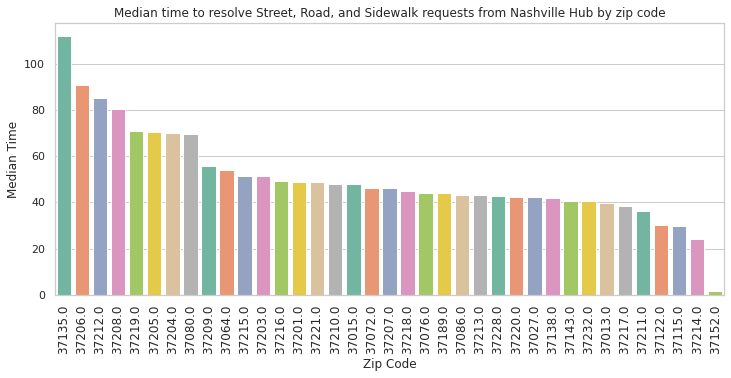

In [58]:
plt.figure(figsize = (12, 5))                               # Increase the plot size to 10 x 6
sns.set(style="whitegrid")                                  # Change the plot style
plt.xticks(rotation = 90,                                   
           fontsize = 12)  
sns.barplot(x = 'zipcode', 
            y = 'median_resolution_time', 
            data = streets_median, 
            palette = 'Set2')
plt.xlabel('Zip Code')                                              
plt.ylabel('Median Time')                                              
plt.title('Median time to resolve Street, Road, and Sidewalk requests from Nashville Hub by zip code');